Import libraries

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Regression Problem. A small dataset about sales and advertisment

In [4]:
data = pd.read_csv('Advertising.csv')

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#train test split
train, test = train_test_split(data, test_size=0.2)

In [8]:
x_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [11]:
#fit model
Regression_model = MLPRegressor(hidden_layer_sizes=(10,10,),max_iter=5000)
Regression_model.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=5000)

In [12]:
#predict
Regression_model.predict(test.iloc[0:170, 1:-1])

array([ 8.02400835,  9.35691572, 24.56931375,  4.06057066,  7.43815388,
        2.92817158, 19.15106766,  9.64827368, 15.13610152, 10.78308571,
       16.34484849,  5.61806045, 15.11562191,  4.11207764,  8.6908106 ,
       20.04469682, 13.32732449, 17.25831674, 14.18621803, 17.0481506 ,
        8.8661911 ,  6.87001371, 21.65733516, 17.04250383, 19.24869249,
       18.92315697, 14.56239276,  4.89912552,  6.34941787,  7.12348481,
        8.53679213, 21.42455904,  6.41835666,  9.88129303, 11.06794968,
       18.7599781 , 20.57823529, 17.98181183, 13.47736991, 12.58574225])

In [13]:
y_predict=Regression_model.predict(test.iloc[0:170, 1:-1])

In [16]:
Regression_model.score(x_train,y_train)

0.961802976296685

In [17]:
y_test=test.iloc[:, -1:]

In [18]:
y_test['prediction']=y_predict

In [19]:
#compare true value and prediction
y_test

,sales,prediction
196,9.7,8.024008
157,10.1,9.356916
183,26.2,24.569314
91,7.3,4.060571
32,9.6,7.438154
108,5.3,2.928172
28,18.9,19.151068
73,11.0,9.648274
161,13.3,15.136102
18,11.3,10.783086


Classification Problem. A small dataset about whehter credit card company should assign new card to a applicant.
Each row is an applicant with 15 features. Last row -1:deny 1:approve

In [21]:
data2 = pd.read_csv('credit-a.csv', header=None)

In [23]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [25]:
#train test split
train, test = train_test_split(data2, test_size=0.2)

In [26]:
x_train = train.iloc[:, 1:-1]
#replace -1 to 0
y_train = train.iloc[:, -1].replace(-1, 0)

In [27]:
y_train

454    1
578    1
505    1
616    1
182    0
      ..
46     0
157    0
257    1
304    0
440    1
Name: 15, Length: 522, dtype: int64

In [29]:
#fit the model
Classification_model = MLPClassifier(hidden_layer_sizes=(100,100,20,),max_iter=1000)
Classification_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 20), max_iter=1000)

In [30]:
Classification_model.score(x_train, y_train)

0.7394636015325671

In [31]:
x_test = test.iloc[:, 1:-1]
y_test = test.iloc[:, -1].replace(-1, 0)

In [32]:
Classification_model.score(x_test, y_test)

0.7175572519083969

In [33]:
#probablity for each result
Classification_model.predict_proba(x_test)

array([[1.19469458e-001, 8.80530542e-001],
       [1.00000000e+000, 2.70824013e-076],
       [1.57716099e-002, 9.84228390e-001],
       [9.18903881e-003, 9.90810961e-001],
       [2.16492791e-002, 9.78350721e-001],
       [8.82079772e-001, 1.17920228e-001],
       [1.00000000e+000, 5.84159554e-027],
       [3.70744151e-002, 9.62925585e-001],
       [9.26129286e-001, 7.38707143e-002],
       [1.88560013e-001, 8.11439987e-001],
       [6.41793478e-002, 9.35820652e-001],
       [7.32390280e-002, 9.26760972e-001],
       [9.83738238e-001, 1.62617625e-002],
       [6.09988396e-002, 9.39001160e-001],
       [1.04858031e-002, 9.89514197e-001],
       [1.69836042e-003, 9.98301640e-001],
       [3.42778124e-002, 9.65722188e-001],
       [1.42636114e-001, 8.57363886e-001],
       [1.24292176e-002, 9.87570782e-001],
       [1.14072741e-002, 9.88592726e-001],
       [1.40271833e-002, 9.85972817e-001],
       [2.12879996e-002, 9.78712000e-001],
       [6.63131270e-002, 9.33686873e-001],
       [4.5

Image Classification problem Use the minst dataset to recognize digits

In [3]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.mnist.load_data()

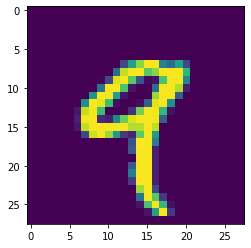

In [38]:
#a sample
plt.imshow(train_image[4])

In [5]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
train_image.shape

(60000, 28, 28)

In [7]:
#reshape 
train_image_flat = train_image.reshape((60000,28*28))
test_image_flat = test_image.reshape((10000,28*28))

In [8]:
train_image_flat.shape

(60000, 784)

In [43]:
#fit the model
image_model = MLPClassifier()
image_model.fit(train_image_flat, train_label)

MLPClassifier()

In [ ]:
#accuracy
image_model.score(train_image_flat, train_label)
image_model.score(test_image_flat, test_label)

In [ ]:
#prediction
image_model.predict(test_image_flat)

In [ ]:
plt.imshow(test_image[0])

Sentimental Analysis. A dataset that each line contains a sentence and the sentiment. neutral, negative or positive

In [52]:
#import this function for vectorize sentences
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
data3=[]
with open('nlp_dataset.txt', 'r', encoding='latin1') as fin:
    for line in fin:
        text, label = line.strip().rsplit("@", 1)
        data3.append([text,label])

In [54]:
data3

[['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
  'neutral'],
 ["For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
  'positive'],
 ['In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .',
  'positive'],
 ['Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .',
  'positive'],
 ['Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales .',
  'positive'],
 ['Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .',
  'positive'],
 ["Clothing retail chain Sepp+ñl+ñ 's sale

In [55]:
df = pd.DataFrame(data3, columns=['text','label'])

In [56]:
df

,text,label
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive
...,...,...
2259,Operating result for the 12-month period decre...,negative
2260,HELSINKI Thomson Financial - Shares in Cargote...,negative
2261,LONDON MarketWatch -- Share prices ended lower...,negative
2262,Operating profit fell to EUR 35.4 mn from EUR ...,negative


In [57]:
df.groupby('label').count()

,text
label,
negative,303
neutral,1391
positive,570


In [58]:
#train test split. In this dataset we may get a imbalanced trainningset. You can try to solve it by yourself
train, test = train_test_split(df, test_size=0.2)

In [60]:
#define vectorizer
idf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

In [61]:
#vectorize
idf_X_train = idf_vectorizer.fit_transform(train['text'])
idf_X_test = idf_vectorizer.transform(test['text'])

In [62]:
#change label to 0 1 2
y_test =test['label'].replace(['negative', 'neutral', 'positive'], [0, 1, 2])
y_train=train['label'].replace(['negative', 'neutral', 'positive'], [0, 1, 2])

In [63]:
idf_X_train.shape

(1811, 20282)

In [64]:
#fit model
lan_model = MLPClassifier()
lan_model.fit(idf_X_train, y_train)

MLPClassifier()

In [65]:
#accuracy
lan_model.score(idf_X_test, y_test)

0.8189845474613686

In [66]:
#a sample
test['text'].iloc[1]

'The Insolvency Act regulates the amount of debt that borrowers are permitted to write off .'

In [67]:
#probability
lan_model.predict_proba(idf_X_test)

array([[0.00179015, 0.99501606, 0.00319379],
       [0.09962664, 0.88780522, 0.01256813],
       [0.00128393, 0.99746504, 0.00125104],
       ...,
       [0.01046247, 0.44575158, 0.54378594],
       [0.00353236, 0.99273711, 0.00373053],
       [0.02491839, 0.92030164, 0.05477996]])

In [68]:
#prediction
lan_model.predict(idf_X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1,
       1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1,